Niranjan Jangir B21CH021

Importing necessary libraries and processing the data, same as the previous question:

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
train_data = loadmat(r"Training_Data_Four_Tanks.mat")
test_data = loadmat(r"Testing_Data_Four_Tanks.mat")

In [ ]:
train_input_data = pd.DataFrame(train_data['input_data'],columns = ['v1','v2'])  #input features from the data
train_output_data = pd.DataFrame(train_data['output_data'],columns =['h1','h2']) #output i.e. target features
train_time_span = pd.DataFrame(train_data['time_span'],columns=['time']) #time span
print(train_input_data.shape)
print(train_output_data.shape)

(90001, 2)
(90001, 2)


In [ ]:
test_input_data = pd.DataFrame(test_data['input_data'],columns = ['v1','v2']) #input features from the data
test_output_data = pd.DataFrame(test_data['output_data'],columns =['h1','h2']) #output i.e. target features
test_time_span = pd.DataFrame(test_data['time_span'],columns=['time']) #time span
print(test_input_data.shape)
print(test_output_data.shape)

(60001, 2)
(60001, 2)


Visualizing the data:

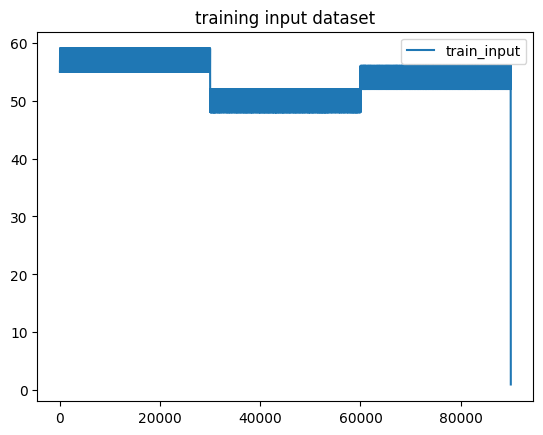

In [ ]:
#training input data:
plt.plot(train_input_data['v1'], label = 'train_input')
plt.title("training input dataset")
plt.legend()
plt.show()

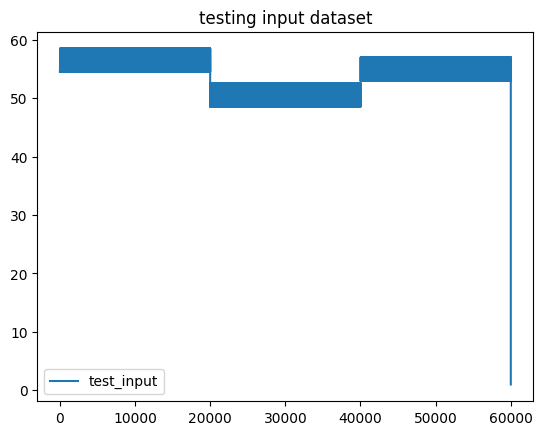

In [ ]:
#testing input data
plt.plot(test_input_data['v1'], label='test_input')
plt.title("testing input dataset")
plt.legend()
plt.show()

  1. As the last row int the input data was [1,1], so droping it from the datasets.
  2. Then Splitting the dataset into three parts as per the above visualization

In [ ]:
#drop the last rows from training input, training output, testing input and testing output
train_input_data = train_input_data.drop(train_input_data.index[-1])
train_output_data = train_output_data.drop(train_output_data.index[-1])
test_input_data = test_input_data.drop(test_input_data.index[-1])
test_output_data = test_output_data.drop(test_output_data.index[-1])

#split the dataset into three parts
train_df_parts = np.array_split(train_input_data, 3)

#assign three different training inputs for their respective operating conditions
train_input_part1 = train_df_parts[0] #57 43
train_input_part2 = train_df_parts[1] #50 50
train_input_part3 = train_df_parts[2] #54 46

#printing the length of each part
print("Length of Part 1:", len(train_input_part1))
print("Length of Part 2:", len(train_input_part2))
print("Length of Part 3:", len(train_input_part3))

Length of Part 1: 30000
Length of Part 2: 30000
Length of Part 3: 30000


In [ ]:
#Split the dataset into three parts
train_output_df_parts = np.array_split(train_output_data, 3)

#Assign three different training inputs for their respective operating conditions
train_output_part1 = train_output_df_parts[0] #57 43
train_output_part2 = train_output_df_parts[1] #50 50
train_output_part3 = train_output_df_parts[2] #54 46

#Printing the length of each part
print("Length of Part 1:", len(train_output_part1))
print("Length of Part 2:", len(train_output_part2))
print("Length of Part 3:", len(train_output_part3))

Length of Part 1: 30000
Length of Part 2: 30000
Length of Part 3: 30000


In [ ]:
#Split the dataset into three parts
test_input_df_parts = np.array_split(test_input_data, 3)

#Assign three different training inputs for their respective operating conditions
test_intput_part1 = test_input_df_parts[0] #57 43
test_intput_part2 = test_input_df_parts[1] #50 50
test_intput_part3 = test_input_df_parts[2] #54 46

# Printing the length of each part
print("Length of Part 1:", len(test_intput_part1))
print("Length of Part 2:", len(test_intput_part2))
print("Length of Part 3:", len(test_intput_part3))

Length of Part 1: 20000
Length of Part 2: 20000
Length of Part 3: 20000


In [ ]:
#Split the dataset into three parts
test_output_df_parts = np.array_split(test_output_data, 3)

#Assign three different training inputs for their respective operating conditions
test_output_part1 = test_output_df_parts[0] #57 43
test_output_part2 = test_output_df_parts[1] #50 50
test_output_part3 = test_output_df_parts[2] #54 46

# Printing the length of each part
print("Length of Part 1:", len(test_output_part1))
print("Length of Part 2:", len(test_output_part2))
print("Length of Part 3:", len(test_output_part3))

Length of Part 1: 20000
Length of Part 2: 20000
Length of Part 3: 20000


Implementaing three different models for three different operating conditions and testing them on corresponding output.

In [ ]:
#For LSTM, first converting the input to numpy array, then reshaping it
train_input_data_array = train_input_part1.to_numpy()
train_input_data_lstm = train_input_data_array.reshape(train_input_data_array.shape[0], 1, train_input_data_array.shape[1])

#Function to return the model 1
def get_lstm_model_1(n_inputs, n_outputs):
    model = Sequential()
    model.add(LSTM(64, input_shape=(None, n_inputs), kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_outputs))
    return model

#Define and compile the LSTM model
lstm_model_1 = get_lstm_model_1(train_input_part1.shape[1], train_output_part1.shape[1])
optimizer = Adam(learning_rate=0.001)  # Custom learning rate for optimization
lstm_model_1.compile(loss='mae', optimizer=optimizer)

#Train the LSTM model
lstm_model_1.fit(train_input_data_lstm, train_output_part1, verbose=1, epochs=50, validation_split=0.2)


# Converting output data to numpy array and reshaping for LSTM
test_input_data_array = test_intput_part1.to_numpy()
test_input_data_lstm = test_input_data_array.reshape(test_input_data_array.shape[0], 1, test_input_data_array.shape[1])

# Evaluate the LSTM model on test data
loss = lstm_model_1.evaluate(test_input_data_lstm, test_output_part1)
print("Test Loss:", loss)


Epoch 1/50
750/750 [==============================] - 4s 3ms/step - loss: 2.7163 - val_loss: 0.2041
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7156 - val_loss: 0.1360
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6660 - val_loss: 0.1422
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6108 - val_loss: 0.2842
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5466 - val_loss: 0.1702
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4640 - val_loss: 0.2025
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3635 - val_loss: 0.1045
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2415 - val_loss: 0.1588
Epoch 9/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1420 - val_loss: 0.0453
Epoch 10/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1226 - val_loss: 0.0495

1. Test Loss = 0.21509
2. As the data is now smaller than the entire dataset, 100 epochs were resulting in overfitting, hence larger loss. Hence reducing it to 50

In [ ]:
train_input_data_array = train_input_part2.to_numpy()
train_input_data_lstm = train_input_data_array.reshape(train_input_data_array.shape[0], 1, train_input_data_array.shape[1])

def get_lstm_model_2(n_inputs, n_outputs):
    model = Sequential()
    model.add(LSTM(64, input_shape=(None, n_inputs), kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_outputs))
    return model


# Define and compile the LSTM model
lstm_model_2 = get_lstm_model_2(train_input_part2.shape[1], train_output_part2.shape[1])
optimizer = Adam(learning_rate=0.001)  # Custom learning rate for optimization
lstm_model_2.compile(loss='mae', optimizer=optimizer)

# Train the LSTM model
lstm_model_2.fit(train_input_data_lstm, train_output_part2, verbose=1, epochs=50, validation_split=0.2)


# Convert DataFrame to NumPy array and reshape for LSTM
test_input_data_array = test_intput_part2.to_numpy()
test_input_data_lstm = test_input_data_array.reshape(test_input_data_array.shape[0], 1, test_input_data_array.shape[1])

# Evaluate the LSTM model on test data
loss = lstm_model_2.evaluate(test_input_data_lstm, test_output_part2)
print("\n\n")
print("Test Loss:", loss)


Epoch 1/50
750/750 [==============================] - 3s 2ms/step - loss: 2.7443 - val_loss: 0.1637
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7313 - val_loss: 0.1030
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6705 - val_loss: 0.1207
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6184 - val_loss: 0.1388
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5466 - val_loss: 0.0965
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4656 - val_loss: 0.0819
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3625 - val_loss: 0.0692
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2372 - val_loss: 0.0453
Epoch 9/50
750/750 [==============================] - 1s 2ms/step - loss: 0.1409 - val_loss: 0.0329
Epoch 10/50
750/750 [==============================] - 1s 2ms/step - loss: 0.1238 - val_loss: 0.0298

In [ ]:
train_input_data_array = train_input_part3.to_numpy()
train_input_data_lstm = train_input_data_array.reshape(train_input_data_array.shape[0], 1, train_input_data_array.shape[1])

def get_lstm_model_3(n_inputs, n_outputs):
    model = Sequential()
    model.add(LSTM(64, input_shape=(None, n_inputs), kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_outputs))
    return model


# Define and compile the LSTM model
lstm_model_3 = get_lstm_model_3(train_input_part3.shape[1], train_output_part3.shape[1])
optimizer = Adam(learning_rate=0.001)  # Custom learning rate for optimization
lstm_model_3.compile(loss='mae', optimizer=optimizer)

# Train the LSTM model
lstm_model_3.fit(train_input_data_lstm, train_output_part3, verbose=1, epochs=50, validation_split=0.2)


# Convert DataFrame to NumPy array and reshape for LSTM
test_input_data_array = test_intput_part3.to_numpy()
test_input_data_lstm = test_input_data_array.reshape(test_input_data_array.shape[0], 1, test_input_data_array.shape[1])

# Evaluate the LSTM model on test data
loss = lstm_model_3.evaluate(test_input_data_lstm, test_output_part3)
print("\n\n")
print("Test Loss:", loss)


Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 2.5448 - val_loss: 0.1597
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7196 - val_loss: 0.1495
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6478 - val_loss: 0.0976
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5579 - val_loss: 0.0772
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4453 - val_loss: 0.0655
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3013 - val_loss: 0.0854
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1543 - val_loss: 0.0316
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0354
Epoch 9/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0770 - val_loss: 0.0418
Epoch 10/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0764 - val_loss: 0.0282

Inference based on if - else for a simple example:

In [ ]:
# using
row = [53,47]
# we get:
# prediction using lstm_model_3
# [[15.340948 14.587563]]
first_value = row[0]
if (54<first_value<57):
    # Use model1 for prediction
    prediction = lstm_model_1.predict(np.array(row).reshape(1, 1, 2))  # Assuming your model expects input shape (batch_size, time_steps, features)
    print("prediction using lstm_model_1")
    print(prediction)
elif (first_value<=50):
    # Use model2 for prediction
    prediction = lstm_model_2.predict(np.array(row).reshape(1, 1, 2))  # Assuming your model expects input shape (batch_size, time_steps, features)
    print("prediction using lstm_model_2")
    print(prediction)
elif (50<first_value<=54):
    # Use model3 for prediction
    prediction = lstm_model_3.predict(np.array(row).reshape(1, 1, 2))  # Assuming your model expects input shape (batch_size, time_steps, features)
    print("prediction using lstm_model_3")
    print(prediction)

1/1 [==============================] - 0s 156ms/step
prediction using lstm_model_3
[[15.340948 14.587563]]


In [ ]:
print(train_input_data)

       v1  v2
0      55  45
1      55  45
2      55  45
3      55  45
4      55  45
...    ..  ..
89995  52  48
89996  56  44
89997  56  44
89998  56  44
89999  52  48

[90000 rows x 2 columns]


Testing the logical inference on random small sample from the original dataset

In [ ]:
from tensorflow.keras.models import load_model

final_responses = []
output_data = []
random_sample = test_input_data.sample(n=100)
for index, row in random_sample.iterrows():
    #just checking the first value of the operating condition, as the second value is just 100-first value
    operating_condition = row['v1']

    # Reshape the row to match the input shape expected by the model
    input_data = np.array(row.values).reshape(1, 1, -1)
    output_data_row = test_output_data.loc[index];
    output_data.append(output_data_row)
    # Choose the appropriate model based on the operating condition
    if (54<operating_condition<=57):
        model = lstm_model_1
    elif (operating_condition<=50):
        model = lstm_model_2
    elif(50< operating_condition <= 54):
        model = lstm_model_3
    else:
        # Handle cases where the operating condition does not match any condition
        continue

    # Make predictions using the selected model
    prediction = model.predict(input_data)

    # Append the predicted response to the final_responses list
    final_responses.append(prediction)



1/1 [==============================] - 0s 64ms/step


In [ ]:
#uncomment this code to print the chosen random sample:
#print(random_sample)
#printing the predictions:
for i in range(len(final_responses)):
  print(final_responses[i][0])

[14.6341715 15.285382 ]
[15.340948 14.587563]
[15.34087  14.587639]
[16.361809  13.6784315]
[14.634602 15.286359]
[14.6341715 15.285382 ]
[15.34087  14.587639]
[14.6341715 15.285382 ]
[15.34087  14.587639]
[15.34087  14.587639]
[14.634602 15.286359]
[15.34087  14.587639]
[15.34087  14.587639]
[16.361809  13.6784315]
[15.34087  14.587639]
[16.361809  13.6784315]
[16.361809  13.6784315]
[16.361809  13.6784315]
[16.361809  13.6784315]
[15.34087  14.587639]
[15.340948 14.587563]
[15.34087  14.587639]
[15.340948 14.587563]
[14.634602 15.286359]
[16.361809  13.6784315]
[16.361809  13.6784315]
[16.361809  13.6784315]
[15.340948 14.587563]
[16.361809  13.6784315]
[15.34087  14.587639]
[15.340948 14.587563]
[16.361809  13.6784315]
[16.361809  13.6784315]
[15.340948 14.587563]
[15.34087  14.587639]
[15.34087  14.587639]
[16.361809  13.6784315]
[14.6341715 15.285382 ]
[15.340948 14.587563]
[14.6341715 15.285382 ]
[14.6341715 15.285382 ]
[15.34087  14.587639]
[14.634602 15.286359]
[15.340948 14.58